In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 서울시 생활인구 점수
- 생활인구 데이터 24절기 모은걸 바탕으로 생활인구 점수 부여
- 유동인구를 대체할 목적

In [ ]:
path = '/content/drive/MyDrive/baf_society/people.csv'
people = pd.read_csv(path, encoding='UTF-8')

In [ ]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451587 entries, 0 to 451586
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시간대구분   451587 non-null  int64  
 1   행정동코드   451587 non-null  int64  
 2   집계구코드   451587 non-null  int64  
 3   1008    451587 non-null  float64
 4   1024    451587 non-null  float64
 5   1108    451587 non-null  float64
 6   1122    451587 non-null  float64
 7   1207    451587 non-null  float64
 8   1221    451587 non-null  float64
 9   0106    451587 non-null  float64
 10  0120    451587 non-null  float64
 11  0204    451587 non-null  float64
 12  0219    451587 non-null  float64
 13  0305    451587 non-null  float64
 14  0320    451587 non-null  float64
 15  0404    451587 non-null  float64
 16  0419    451587 non-null  float64
 17  0505    451587 non-null  float64
 18  0520    451587 non-null  float64
 19  0605    451587 non-null  float64
 20  0621    451587 non-null  float64
 21  0706    45

In [ ]:
people.rename(columns={'1122.1': '1221'}, inplace=True)

In [ ]:
people

,시간대구분,행정동코드,집계구코드,1008,1024,1108,1122,1207,1221,0106,...,0505,0520,0605,0621,0706,0722,0807,0822,0907,0922
0,0,11110515,1101072010001,496.4582,515.4265,507.5455,513.0993,530.6146,513.0993,538.8727,...,518.3429,587.4378,551.4483,561.8367,527.9201,580.8595,521.6500,560.5242,527.8587,535.9129
1,0,11110515,1101072010002,728.5865,669.0323,693.6145,689.5656,711.4781,689.5656,796.0126,...,735.1587,681.4183,732.4094,706.4319,735.4753,676.8983,711.7991,706.7113,773.3729,726.2573
2,0,11110515,1101072010003,559.3274,583.3767,589.3536,612.9021,572.8479,612.9021,573.1717,...,483.2775,608.6296,569.0688,622.4440,555.2522,607.6532,513.6029,550.8519,501.0307,607.5141
3,0,11110515,1101072010004,180.8022,205.8083,198.2306,199.1707,190.0191,199.1707,192.5355,...,171.9398,175.0297,161.4151,170.5590,167.2546,144.9837,158.2260,170.5275,164.2796,180.6078
4,0,11110515,1101072010005,153.5792,165.8825,165.3500,179.5158,162.9952,179.5158,156.8191,...,104.4161,117.4880,116.4965,128.6720,122.7718,123.5099,105.1319,114.3695,119.2485,133.9738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451582,23,11740700,1125071022201,803.3455,768.7511,795.8829,821.4531,846.4907,821.4531,908.1416,...,817.9817,807.4531,785.4434,830.7888,831.8181,832.6411,852.2582,810.4452,835.9912,852.8365
451583,23,11740700,1125071022202,194.6490,188.7677,197.8103,201.8045,211.0842,201.8045,217.6432,...,198.6992,203.2109,194.7101,207.1715,201.0586,212.7239,213.8445,203.2124,202.3828,207.8593
451584,23,11740700,1125071022501,818.8981,865.8029,890.3666,727.4515,799.2795,727.4515,861.2048,...,768.8731,756.9956,807.3322,793.5992,866.0738,811.7577,754.7595,750.6550,796.8120,865.0272
451585,23,11740700,1125071022701,61.6729,61.5549,64.4849,77.6809,68.9813,77.6809,72.5028,...,6.7998,8.5707,6.5969,62.6549,70.7833,19.1435,73.6301,71.6891,58.3994,26.5607


In [ ]:
# file_path = '/content/drive/MyDrive/baf_society/people.csv'
# people.to_csv(file_path, index=False)

### 행정동코드 기준
- 각 행정동에 집계구가 얼마나 들어있는지 확인
- 절기 -> 4계절로 나눠서
- 분기 -> 1~4분기

In [ ]:
df = people.copy()

In [ ]:
df['행정동코드'].value_counts()

,count
행정동코드,
11470640,2511
11380690,2426
11500540,2371
11740685,2268
11380625,2244
...,...
11140605,168
11140550,124
11110540,120


In [ ]:
df.head()

,시간대구분,행정동코드,집계구코드,1008,1024,1108,1122,1207,1221,0106,...,0505,0520,0605,0621,0706,0722,0807,0822,0907,0922
0,0,11110515,1101072010001,496.4582,515.4265,507.5455,513.0993,530.6146,513.0993,538.8727,...,518.3429,587.4378,551.4483,561.8367,527.9201,580.8595,521.6500,560.5242,527.8587,535.9129
1,0,11110515,1101072010002,728.5865,669.0323,693.6145,689.5656,711.4781,689.5656,796.0126,...,735.1587,681.4183,732.4094,706.4319,735.4753,676.8983,711.7991,706.7113,773.3729,726.2573
2,0,11110515,1101072010003,559.3274,583.3767,589.3536,612.9021,572.8479,612.9021,573.1717,...,483.2775,608.6296,569.0688,622.4440,555.2522,607.6532,513.6029,550.8519,501.0307,607.5141
3,0,11110515,1101072010004,180.8022,205.8083,198.2306,199.1707,190.0191,199.1707,192.5355,...,171.9398,175.0297,161.4151,170.5590,167.2546,144.9837,158.2260,170.5275,164.2796,180.6078
4,0,11110515,1101072010005,153.5792,165.8825,165.3500,179.5158,162.9952,179.5158,156.8191,...,104.4161,117.4880,116.4965,128.6720,122.7718,123.5099,105.1319,114.3695,119.2485,133.9738


- 하나의 행정동 안에 몇개의 집계구가 들어있는지 확인


In [ ]:
## 각각의 행정동에 몇개의 집계구가 있는지 확인
df.groupby('행정동코드')['집계구코드'].nunique()

,집계구코드
행정동코드,
11110515,26
11110530,17
11110540,5
11110550,20
11110560,37
...,...
11740650,48
11740660,47
11740685,95


- 계절별 / 분기별 고려

In [ ]:
# # 계절에 따른 매핑을 업데이트
# season_mapping.update({
#     '0120': 'Winter', '0204': 'Winter', '0219': 'Winter',
#     '0305': 'Spring', '0320': 'Spring', '0404': 'Spring', '0419': 'Spring'
# })

# # 원본 데이터 프레임을 복사
# people_df_seasonal = df.copy()

# # 각 날짜 컬럼을 순회하며 계절 정보를 포함한 새로운 컬럼명으로 변경
# for col in df.columns[3:-1]:  # 날짜 외의 컬럼과 추가된 평균 컬럼은 제외
#     month_day = col[:4]  # 컬럼명에서 월과 일 정보 추출
#     season = season_mapping[month_day]  # 월과 일 정보를 바탕으로 계절 결정
#     df_seasonal.rename(columns={col: f"{season}_{col}"}, inplace=True)

# # 각 계절별로 해당하는 컬럼만 선택하여 평균을 계산
# season_columns = [col for col in df_seasonal.columns if col.split('_')[0] in season_mapping.values()]
# df_seasonal['Average_Winter'] = df_seasonal.filter(regex='Winter').mean(axis=1)
# df_seasonal['Average_Spring'] = df_seasonal.filter(regex='Spring').mean(axis=1)
# df_seasonal['Average_Summer'] = df_seasonal.filter(regex='Summer').mean(axis=1)
# df_seasonal['Average_Autumn'] = df_seasonal.filter(regex='Autumn').mean(axis=1)

# # 행정동 코드와 각 계절별 평균 생활인구 점수를 포함한 결과를 표시
# df_seasonal[['행정동코드', 'Average_Winter', 'Average_Spring', 'Average_Summer', 'Average_Autumn']].head()


- 분기별로 평균값 계산

In [ ]:
# 분기에 따른 매핑을 정의
quarter_mapping = {
    '0106': 'Q1', '0120': 'Q1', '0204': 'Q1', '0219': 'Q1', '0305': 'Q1', '0320': 'Q1',
    '0404': 'Q2', '0419': 'Q2', '0505': 'Q2', '0520': 'Q2', '0605': 'Q2', '0621': 'Q2',
    '0706': 'Q3', '0722': 'Q3', '0807': 'Q3', '0822': 'Q3', '0907': 'Q3', '0922': 'Q3',
    '1008': 'Q4', '1024': 'Q4', '1108': 'Q4', '1122': 'Q4', '1207': 'Q4', '1221': 'Q4'
}

# 원본 데이터 프레임을 복사
people_df_quarter = df.copy()

# 각 날짜 컬럼을 순회하며 분기 정보를 포함한 새로운 컬럼명으로 변경
for col in df.columns[3:-1]:  # 날짜 외의 컬럼과 추가된 평균 컬럼은 제외
    month_day = col[:4]  # 컬럼명에서 월과 일 정보 추출
    quarter = quarter_mapping[month_day]  # 월과 일 정보를 바탕으로 분기 결정
    people_df_quarter.rename(columns={col: f"{quarter}_{col}"}, inplace=True)

# 각 분기별로 해당하는 컬럼만 선택하여 평균을 계산
people_df_quarter['Average_Q1'] = people_df_quarter.filter(regex='Q1').mean(axis=1)
people_df_quarter['Average_Q2'] = people_df_quarter.filter(regex='Q2').mean(axis=1)
people_df_quarter['Average_Q3'] = people_df_quarter.filter(regex='Q3').mean(axis=1)
people_df_quarter['Average_Q4'] = people_df_quarter.filter(regex='Q4').mean(axis=1)

# 행정동 코드와 각 분기별 평균 생활인구 점수를 포함한 결과를 표시
people_df_quarter[['시간대구분','행정동코드', '집계구코드' ,'Average_Q1', 'Average_Q2', 'Average_Q3', 'Average_Q4']].head()


,시간대구분,행정동코드,집계구코드,Average_Q1,Average_Q2,Average_Q3,Average_Q4
0,0,11110515,1101072010001,556.700233,558.795133,543.76250,512.707233
1,0,11110515,1101072010002,752.357750,698.218250,720.85138,696.973767
2,0,11110515,1101072010003,574.369900,582.220600,545.67818,588.451633
3,0,11110515,1101072010004,199.122717,171.167017,161.05428,195.533600
4,0,11110515,1101072010005,162.432433,125.980533,117.00632,167.806417


In [ ]:
df_quarter = people_df_quarter[['시간대구분','행정동코드', '집계구코드' ,'Average_Q1', 'Average_Q2', 'Average_Q3', 'Average_Q4']]

In [ ]:
# 각 행정동별로 집계구의 수를 세어 저장
jipgegu = df_quarter.groupby('행정동코드')['집계구코드'].nunique()

### 분기별 점수 생성
- 7~22시를 활동시간으로 보고 1.2의 가중치 부여
- 행정동 별로 평균점수 확인

In [ ]:
# 시간대 구분  (7시부터 22시)
time_range = list(range(7, 23))  # 오전 7시부터 오후 10시까지

# 시간대별 데이터 필터링 및 가중치 적용
filtered_df = df_quarter[df_quarter['시간대구분'].isin(time_range)]
for col in filtered_df.columns[3:-1]:  # 날짜 관련 데이터 컬럼 순회
    filtered_df[col] *= 1.2

# 가중치가 적용되지 않은 원본 데이터의 동일 행정동 데이터 선택
original_df = df_quarter[~df_quarter['시간대구분'].isin(time_range)]

# 행정동별로 가중치 적용 데이터와 원본 데이터 합치기
combined_df = pd.concat([filtered_df, original_df])
# 행정동별로 데이터 합산
summed_df = combined_df.groupby('행정동코드').sum().reset_index()
mean_df = combined_df.groupby('행정동코드').mean().reset_index()
# 결과 확인
# print(summed_df.head(), mean_df.head())

<ipython-input-32-5df452e5344f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] *= 1.2


In [ ]:
# summed_df.head()

In [ ]:
mean_df.head()

,행정동코드,시간대구분,집계구코드,Average_Q1,Average_Q2,Average_Q3,Average_Q4
0,11110515,11.500000,1.101072e+12,734.394085,759.026759,685.370314,682.246392
1,11110530,11.497525,1.101053e+12,1636.952653,1775.997968,1636.202140,1619.144200
2,11110540,11.500000,1.101054e+12,1280.541510,1513.735457,1404.378990,1223.380479
3,11110550,11.517820,1.101055e+12,762.965024,745.665363,708.262081,727.439876
4,11110560,11.766706,1.101056e+12,555.771995,539.816557,540.963813,486.679887


In [ ]:
## 하나의 행정동 안에 최대 107개의 집계구가 포함되어있음
jipgegu.sort_values()

,집계구코드
행정동코드,
11710631,1
11110540,5
11140520,5
11140550,6
11140605,7
...,...
11650651,95
11740685,95
11500540,99


In [ ]:
mean_df = mean_df.drop(columns=['집계구코드','시간대구분'])

In [ ]:
mean_df

,행정동코드,Average_Q1,Average_Q2,Average_Q3,Average_Q4
0,11110515,734.394085,759.026759,685.370314,682.246392
1,11110530,1636.952653,1775.997968,1636.202140,1619.144200
2,11110540,1280.541510,1513.735457,1404.378990,1223.380479
3,11110550,762.965024,745.665363,708.262081,727.439876
4,11110560,555.771995,539.816557,540.963813,486.679887
...,...,...,...,...,...
419,11740650,584.308721,549.097884,572.256123,493.407822
420,11740660,667.141634,658.384944,671.900943,563.790908
421,11740685,686.633375,640.979898,687.253797,592.236131
422,11740690,136.517041,143.988100,128.710637,122.432878


In [ ]:
people_score = mean_df.copy()

In [ ]:
path = '/content/drive/MyDrive/baf_society/merged_people_score.csv'
people_score = pd.read_csv(path, encoding='UTF-8')

In [ ]:
data = people_score.copy()

### EDA
- 분기별 생활인구 점수 이상치 확인
  -> 명동, 소공동, 종로 등의 관광지가 이상치로 확인됨

In [ ]:
data

,행정동코드,Average_Q1,Average_Q2,Average_Q3,Average_Q4,읍면동명
0,11740690,136.517041,143.988100,128.710637,122.432878,둔촌제1동
1,11650550,210.032444,246.183711,242.323466,187.700730,반포본동
2,11545700,296.174740,272.501487,276.773794,253.532040,시흥제4동
3,11545710,300.388150,282.264142,287.392385,260.232456,시흥제5동
4,11470610,343.572430,290.197846,328.639207,293.366894,신월6동
...,...,...,...,...,...,...
412,11140605,2657.802249,3041.751389,2608.668265,2782.543846,을지로동
413,11710631,3561.627547,3327.895396,3468.457905,3060.731352,가락1동
414,11110615,4699.865014,5220.727186,4840.405002,4587.821822,종로1.2.3.4가동
415,11140520,6332.220608,7804.644775,6679.978289,6779.078781,소공동


In [ ]:
# 기술통계 출력
data.describe()

,행정동코드,Average_Q1,Average_Q2,Average_Q3,Average_Q4
count,4.170000e+02,417.000000,417.000000,417.000000,417.000000
mean,1.143429e+07,702.691955,708.376487,693.791968,633.205865
std,1.923019e+05,619.227792,729.412849,650.996037,639.363155
min,1.111052e+07,136.517041,143.988100,128.710637,122.432878
25%,1.126062e+07,454.472173,433.041442,437.467032,394.943196
50%,1.144066e+07,555.107712,550.620138,540.812760,486.679887
75%,1.162052e+07,731.240727,724.532526,711.614495,639.220284
max,1.174070e+07,8033.723652,9669.969867,8561.570260,8449.948933


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


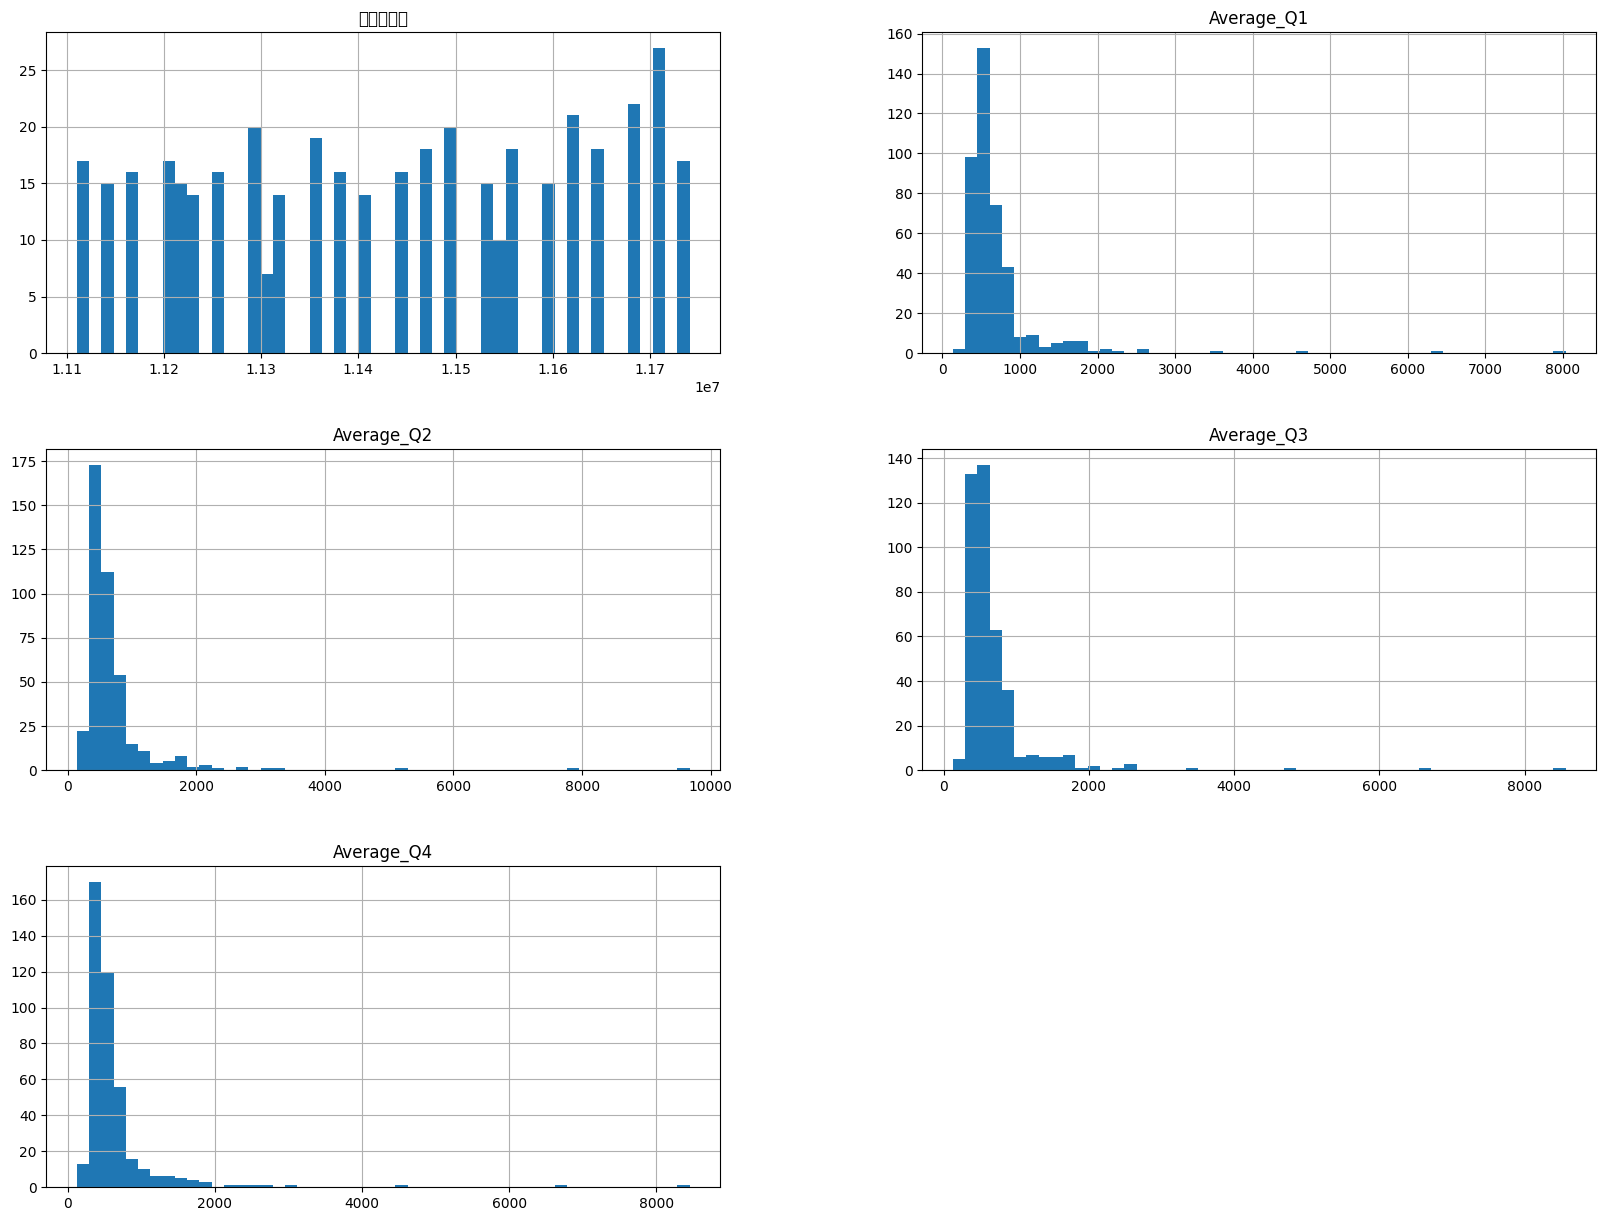

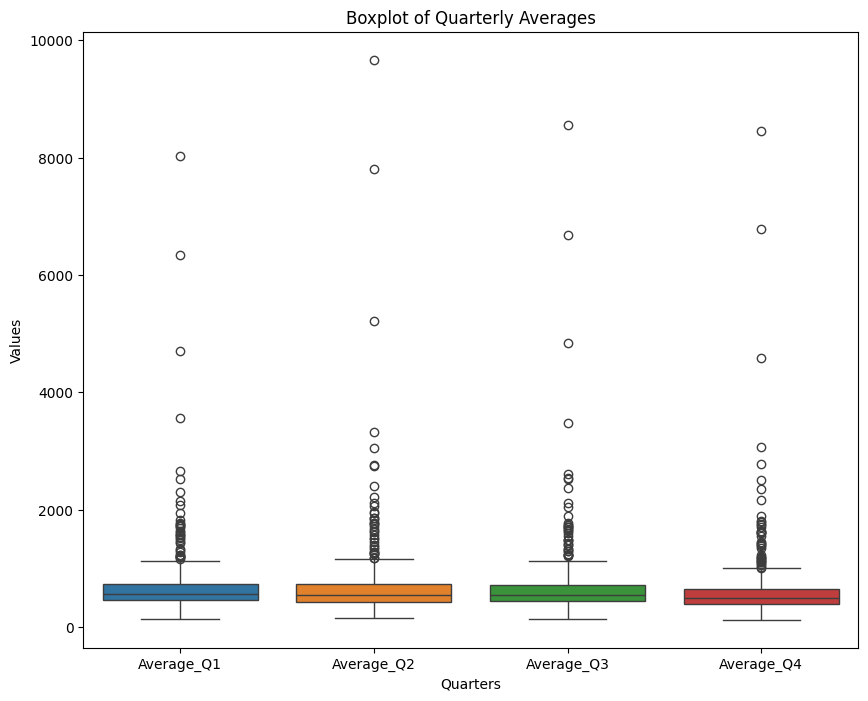

In [ ]:
# 히스토그램
data.hist(bins=50, figsize=(20, 15))
plt.show()

# 박스플롯
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[['Average_Q1',	'Average_Q2',	'Average_Q3',	'Average_Q4']])
plt.title('Boxplot of Quarterly Averages')
plt.ylabel('Values')
plt.xlabel('Quarters')
plt.show()

In [ ]:
# 'Average_Q1' 기준으로 내림차순 정렬
sorted_data = data.sort_values(by='Average_Q1', ascending=False)

# 상위 5개 행 출력
sorted_data.head()

,행정동코드,Average_Q1,Average_Q2,Average_Q3,Average_Q4,읍면동명
416,11140550,8033.723652,9669.969867,8561.570260,8449.948933,명동
415,11140520,6332.220608,7804.644775,6679.978289,6779.078781,소공동
414,11110615,4699.865014,5220.727186,4840.405002,4587.821822,종로1.2.3.4가동
413,11710631,3561.627547,3327.895396,3468.457905,3060.731352,가락1동
412,11140605,2657.802249,3041.751389,2608.668265,2782.543846,을지로동


In [ ]:
# 열 이름 변경
data.columns = ['행정동코드', '1분기 평균', '2분기 평균', '3분기 평균', '4분기 평균','행정동명']

# 변경된 데이터를 확인
print(data.head())

      행정동코드      1분기 평균      2분기 평균      3분기 평균      4분기 평균   행정동명
0  11740690  136.517041  143.988100  128.710637  122.432878  둔촌제1동
1  11650550  210.032444  246.183711  242.323466  187.700730   반포본동
2  11545700  296.174740  272.501487  276.773794  253.532040  시흥제4동
3  11545710  300.388150  282.264142  287.392385  260.232456  시흥제5동
4  11470610  343.572430  290.197846  328.639207  293.366894   신월6동


- 생활인구 점수 : 표준화

In [ ]:
## 점수 표준화
from sklearn.preprocessing import StandardScaler
score_columns = ['1분기 평균', '2분기 평균', '3분기 평균', '4분기 평균']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 수치형 변수 표준화
data[score_columns] = scaler.fit_transform(data[score_columns])

# 표준화된 데이터 확인
print(data[score_columns].head())

     1분기 평균    2분기 평균    3분기 평균    4분기 평균
0 -0.915422 -0.774687 -0.869068 -0.799837
1 -0.796559 -0.634412 -0.694337 -0.697632
2 -0.657279 -0.598287 -0.641354 -0.594545
3 -0.650467 -0.584887 -0.625023 -0.584052
4 -0.580644 -0.573997 -0.561588 -0.532166


In [ ]:
data

,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,행정동명
0,11740690,-0.915422,-0.774687,-0.869068,-0.799837,둔촌제1동
1,11650550,-0.796559,-0.634412,-0.694337,-0.697632,반포본동
2,11545700,-0.657279,-0.598287,-0.641354,-0.594545,시흥제4동
3,11545710,-0.650467,-0.584887,-0.625023,-0.584052,시흥제5동
4,11470610,-0.580644,-0.573997,-0.561588,-0.532166,신월6동
...,...,...,...,...,...,...
412,11140605,3.161129,3.202820,2.944989,3.365724,을지로동
413,11710631,4.622483,3.595584,4.267305,3.801347,가락1동
414,11110615,6.462847,6.193709,6.377295,6.192672,종로1.2.3.4가동
415,11140520,9.102128,9.740427,9.206472,9.624038,소공동


- 스케일링 방법 고민

- 생활인구 점수 정규화
  - 0~100점 사이의 점수를 갖도록 함
  - 0~1점

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# ## 점수 정규화 0~100 사이의 점수를 가지도록 함
# score_columns = ['1분기 평균', '2분기 평균', '3분기 평균', '4분기 평균']

# # MinMaxScaler 초기화 (0에서 100 사이)
# scaler = MinMaxScaler(feature_range=(0, 100))

# # 수치형 변수 정규화
# data[score_columns] = scaler.fit_transform(data[score_columns])

# # 정규화된 데이터 확인
# print(data[score_columns].head())

     1분기 평균    2분기 평균    3분기 평균    4분기 평균
0  0.000000  0.000000  0.000000  0.000000
1  0.930904  1.072809  1.347263  0.783761
2  2.021698  1.349083  1.755788  1.574289
3  2.075052  1.451567  1.881707  1.654750
4  2.621881  1.534852  2.370828  2.052641


In [ ]:
data

,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,행정동명
0,11740690,0.000000,0.000000,0.000000,0.000000,둔촌제1동
1,11650550,0.930904,1.072809,1.347263,0.783761,반포본동
2,11545700,2.021698,1.349083,1.755788,1.574289,시흥제4동
3,11545710,2.075052,1.451567,1.881707,1.654750,시흥제5동
4,11470610,2.621881,1.534852,2.370828,2.052641,신월6동
...,...,...,...,...,...,...
412,11140605,31.926292,30.419576,29.408264,31.943631,을지로동
413,11710631,43.371165,33.423403,39.603971,35.284213,가락1동
414,11110615,57.784331,53.293605,55.873032,53.622099,종로1.2.3.4가동
415,11140520,78.454368,80.418553,77.687379,79.935552,소공동


-

In [ ]:
# file_path = '/content/drive/MyDrive/baf_society/people_score_minmax.csv'
# data.to_csv(file_path, index=False)